In [18]:
import numpy as np
import numpy.fft as fft

from scipy import signal as sg
from skimage import io

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append("/home/tintin/rongheng/cv/lib/")

from image_lib import load_img, show_img, show_hist, resize_img
from signal_lib import bandpass
from edge_lib import threshold

img = load_img("bearing_scrached_fuji_tunnel.jpg")

In [13]:
def bandpass_kernel(lowcut, highcut, transition, sample_frequency):
    bandpass_wavelet, length = bandpass(lowcut, highcut, transition, sample_frequency)
    bandpass_2d = np.outer(bandpass_wavelet, bandpass_wavelet)

    return bandpass_2d, length

Filter Length = 51


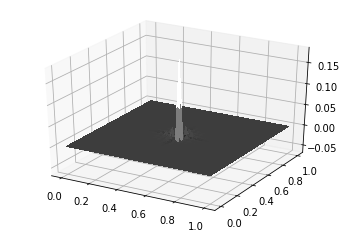

In [14]:
kernel = bandpass_kernel(cutoff_low=120, cutoff_high=10, transition_band=40, sample_frequency = 500)
_, size = kernel.shape
X, Y = np.meshgrid(np.linspace(0,1,size), np.linspace(0,1,size))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, kernel, rstride=1, cstride=1, cmap="gray", linewidth=0, aa=False)

Filter Length = 101


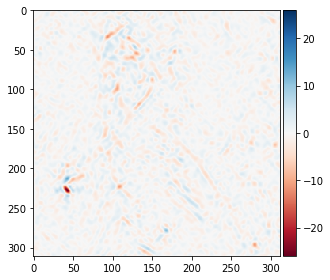

<function __main__.adjust_bandpass(cutoff_low=120, cutoff_high=10, transition_band=40)>

In [17]:
def adjust_bandpass(cutoff_low=120, cutoff_high=10, transition_band=40):
    filtered_img = sg.convolve(bandpass_kernel(cutoff_low, cutoff_high, transition_band, sample_frequency=1000), img, 'valid')
    io.imshow(filtered_img)
    
interact(adjust_bandpass, cutoff_low=(0,1000), cutoff_high=(0,1000), transition_band=(0,1000))

Filter Length = 21


/home/tintin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


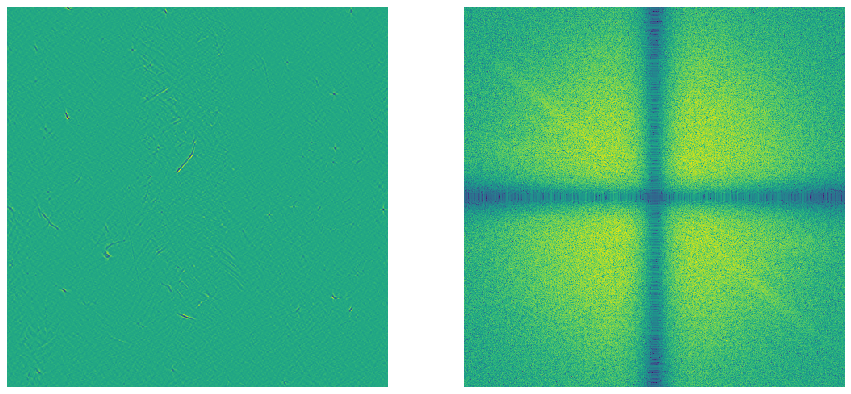

In [16]:
kernel, length = bandpass_kernel(500, 5, 1, sample_frequency=1000)
filtered_img = sg.convolve(kernel, img, 'full')
filtered_img = filtered_img[length:-length,length:-length]
filtered_img = threshold(filtered_img, -5.5, invert=True)


<Figure size 864x864 with 0 Axes>

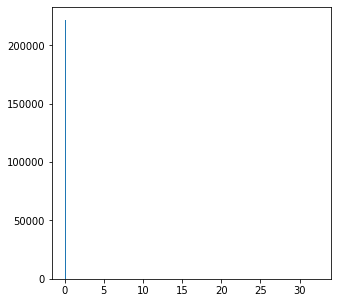

In [6]:
scratches = threshold(np.abs(filtered_img), .23, percent=True)
show_img(scratches,color=True,size=(12,12))

show_hist(scratches)

In [7]:
fourier_raw = fft.fft2(filtered_img)
fourier_img = fft.fftshift(fourier_raw)
show_img((20*np.log10(0.1 + fourier_img)).astype(int), color=True) 

/home/tintin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 360x360 with 0 Axes>

<Figure size 720x720 with 0 Axes>

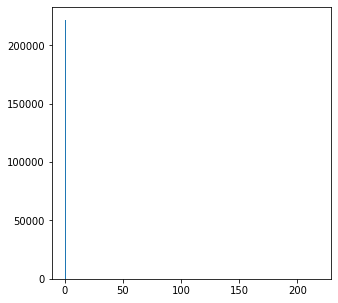

[(slice(0, 3, None), slice(73, 77, None)),
 (slice(0, 1, None), slice(77, 78, None)),
 (slice(1, 4, None), slice(77, 80, None))]

In [8]:
# Morphology
binary_img = scratches.astype(bool)  # make binary
#binary_img = np.logical_not(binary_img)  # invert

#struct_elem = morph.generate_binary_structure(2, 1)
#print(struct_elem.astype(int))

#scratches = morph.binary_dilation(binary_img, struct_elem, 1)

labels, num_obj = measure.label(binary_img)
show_img(labels, color=True, size=(10,10))
show_hist(labels)

measure.find_objects(labels,max_label=3)

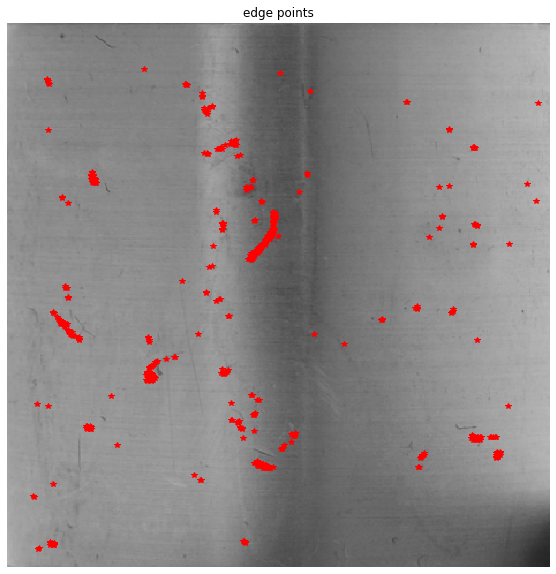

In [9]:
# Points
resized_img = resize_img(img, scratches.shape)
points = get_points(scratches, min_dist=10, allow_cluster=True)
overlay_points(resized_img, points, size=(10, 10))

In [10]:
# Count 
labels, num_scraches = measure.label(scratches_dial)
print("Number of Scraches: ", num_scraches)

NameError: name 'scratches_dial' is not defined